# IMPORTING LIBERARIES

In [1]:
import pandas as pd
dataset = pd.read_csv('C:\\Users\mohdf\Downloads\iris.csv')
X = dataset.iloc[:, [1,2]].values

# PREVIEW OF DATA

In [2]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.shape

(150, 6)

# KMEANS ALGORITHM

In [6]:
from sklearn.cluster import KMeans
noofclus = 16
wcss_array = []

for i in range(1, noofclus):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    wcss_array.append(k_means.inertia_)
    
print(wcss_array)

[130.18093333333334, 57.982406042078765, 37.12370212765957, 27.961759657351315, 21.077101654961503, 17.72402486772487, 14.723644130102675, 12.7037857975358, 11.16093971237741, 9.748243867243872, 8.722033327096025, 7.97987365036924, 7.191165728492357, 6.518123146074775, 5.935707523685464]


# USING MATPLOTLIB FOR VISUALIZATION

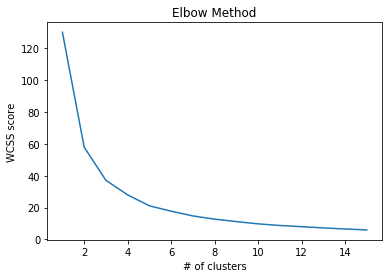

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1,noofclus), wcss_array)    
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS score')
plt.show()         

# MAKING PREDICTION

In [8]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 50)
pred_means = k_means.fit_predict(X)
size = 50

# CLUSTERING

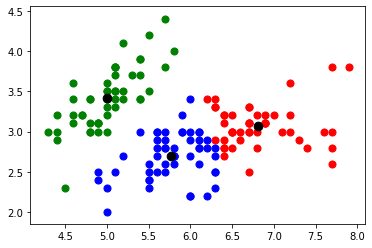

In [9]:
plt.scatter(X[pred_means == 0, 0], X[pred_means == 0, 1], s = size, c = 'red')
plt.scatter(X[pred_means == 1, 0], X[pred_means == 1, 1], s = size, c = 'blue')
plt.scatter(X[pred_means == 2, 0], X[pred_means == 2, 1], s = size, c = 'green')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 75, c = 'black')
plt.show()